# SYRIATEL CUSTOMER CHURN.<br>
Author: Leonard Rotich<br>
LinkdIn:

## Introduction

Churn is a major problem for SyriaTel Company, as it can result in lost revenue and reduced profitability. In this project, I aim to develop a machine learning algorithms to build a model to predict and identify customers who are at risk of churning, and provide recommendations to reduce churn rates. In this project, I am going to use SytiaTel Customer Churn dataset which can be found [here](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset).<br>

## Business Understanding:

Customer churn is a big problem in any industry and one of the most important concerns for the Telecom industry. The effect on the revenues of the companies, because of this customer churns is huge, especially in the telecom field, that's why these companies are seeking to develop a predictive potential customer churn. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate, and it costs 5-10 times more to acquire a new customer than to retain an existing one, that's why customer retention has now become even more important than customer acquisition.<br>

Customer churn is a metric showing when a subscriber or a regular customer cancels his subscription or stops doing business with a company. Churn could be due to various factors, including switching to a competitor for better price offers, cancelling their subscription because of poor customer service, or discontinuing all contact with a brand due to insufficient touch points.<br>

Syriatel is a provider of mobile telecommunication and data services based in Damascus, Syria. It has established that long-term relationships with customers are more effective than trying to attract new customers. Churn prediction has therefore become a very important part of the company's strategy.<br>


## Objectives:
>To build a machine learning model that can accurately predict customers who will churn based on the information available in the dataset.<br>

>To identify the features that are important for predicting customer churn.<br>

>To advise SyriaTel on how to retain customers.<br>

>To identify the cause of churn.<br>

## Data Understanding:

The dataset has 3333 rows (customers) and with 21 columns. Churn column is the target variable which has 483 customers who are churners and the remaining 2850 are non-churners. Since the target variable is a categorical variable, classification algorithms are used to build the predictive model. Recall is used to evaluate the model's performance.


## Loading Data

Importing Libraries.




In [3]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline

The data used is a csv file `syriatel.csv`. Load the data and preview the first and the last five. 

In [4]:
# importing data using pandas
import pandas as pd 
df = pd.read_csv('data\syriatel.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
# Shape of the dataset
print(f'The dataset has:\n {df.shape[0]}, Rows. \n {df.shape[1]} Columns which are as follows:\n {df.columns}')

The dataset has:
 3333, Rows. 
 21 Columns which are as follows:
 Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


In [ ]:
# Getting the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

As we can see, the data set has 3333 rows and 21 columns which has a mixture of float, objects, integer and bool


In [ ]:
# df discriptive summary
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


The target variable `churn` has 2850 loyal curstomers and 483 churners. 

### Data cleaning

In this section we will check on:<br> 
**1. Dublicates**


In [ ]:
# Function for checking duplicated entries
def identify_duplicates(df):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in df.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates)
    if (len(duplicates_set) == 1):
        print("The Data has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates
        duplicates_percentage = np.round(((no_true / len(df)) * 100), 3)
        print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.")
identify_duplicates(df)

The Data has no duplicates


The customer's `phone number` is the unique identifier and there should be no duplicate o this column.

In [ ]:
# function for checking unique duplicates in unique columns
def unique_column_duplicates(data, column):
    duplicates = [] 
    for d in data[column].duplicated():
        duplicates.append(d)
    # identify if there are any duplicates
    duplicates_set = set(duplicates)
    if (len(duplicates_set) == 1):
        print(f"The column {column.title()} has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
                # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 2)
        print(f"The column {column.title()} has {no_true} duplicated rows.\nWhich trasnlate to {duplicates_percentage}% of the data set.")

unique_column_duplicates(df, 'phone number')   

The column Phone Number has no duplicates


**2. Missing Values**

We need to check on our dataset if there are missing values.


In [ ]:
# identify if data has missing values
def identify_missing_values(data):
    # empty dict to store missing values
    missing = []
    for i in data.isnull().any():
        # add the bool values to empty list 
        missing.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        out = print("The Data has no missing values")
    else:
        out = print("The Data has missing values.")

    return out


identify_missing_values(df)

The Data has no missing values


There are no missing value s in our dataset. 

Since area code is not imortant in any calculation we are going to convert it to object type

In [ ]:
# convert area code from integer to string
df['area code'] = df['area code'].astype(object)
df['area code'].dtype

dtype('O')

## Exploratory Data Analysis

### **Churn column**

In [ ]:
# Checking the value count of the target variable 
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

The **False** values stands for the customers who aren't churners which has a greater percentage **`85%`** as compared to the **True** value which are the churners which is **`15%`**. we can get a clear idea of these using visualization as follows.

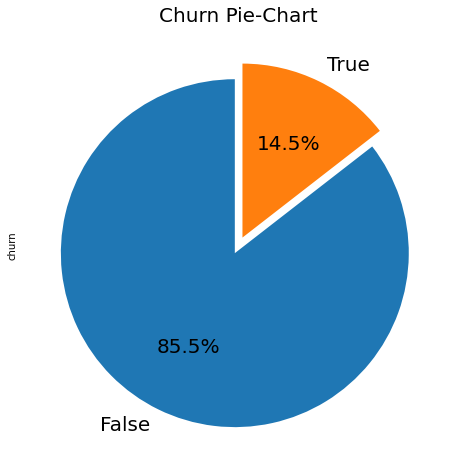

In [ ]:
def pie(data, col, titles):
# visualize churn distribution using pie chart 
    data[col].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  
                                 startangle=90,shadow=False, 
                                 figsize=(8,8), textprops={'fontsize': 20},
                                 style="darkgrid")
    plt.title(titles,fontsize=20)
    plt.show();
pie(df, 'churn', 'Churn Pie-Chart')

### **State column**

It is important to understand the spread of customers of the company so as to have a wide idea of the project. 

In [ ]:
# checking on the distribution of the customers 
print(f'SyriaTel customers are spread in {df.state.nunique()} states.')

SyriaTel customers are spread in 51 states.


In [ ]:

# creating a dataframe for state value count
states = dict(df.state.value_counts())
state_name = list(dict(dict(states)).keys())
state_customers = list(dict(dict(states)).values())
# calculating percentage of customers per state
state_churn_percnt = (state_customers/sum(state_customers)) * 100

state_df = pd.DataFrame({'state_name': state_name,
                        'state_churn': state_customers,
                        'state_churn_%': state_churn_percnt})
state_df.head()

,state_name,state_churn,state_churn_%
0,WV,106,3.180318
1,MN,84,2.520252
2,NY,83,2.490249
3,AL,80,2.400240
4,WI,78,2.340234


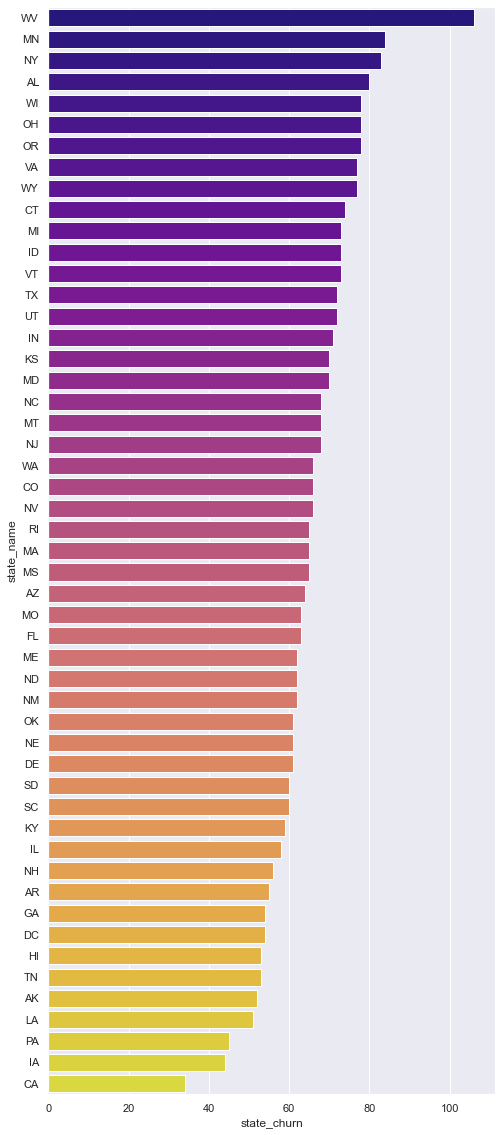

In [ ]:
# Plotting customers distribiution per state.
def barchart(x, y,size, colors):
    sns.set(style="darkgrid")
    plt.figure(figsize=size)
    ax = sns.barplot(x=x, y=y, orient='h', palette=colors)
    plt.show()
barchart(state_df.state_churn,state_df.state_name,(8,20),'plasma')

Majority of the SyriaTel customers are from WV state with a value of **106** customers which translate to **'3.18%'** of the total customers.

Further on the `state` column, an understanding of the distribution of the churn per state will and value on our analysis.


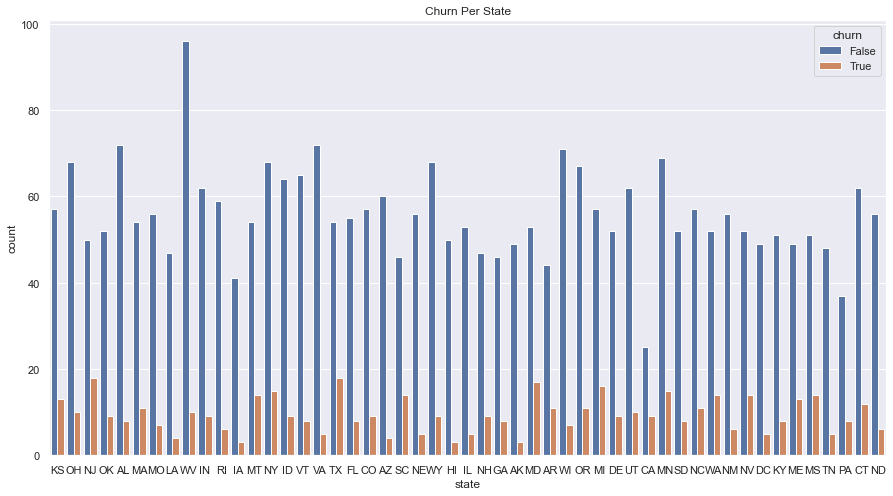

In [ ]:
# plotting true and false churns in all 51 states.
def count_plt(x, hue, size, title):
    sns.set(style="darkgrid")
    plt.figure(figsize=size)
    ax = sns.countplot(x=x, hue=hue)
    plt.title(title)
    plt.show();
count_plt(df.state, df.churn, (15,8), 'Churn Per State')

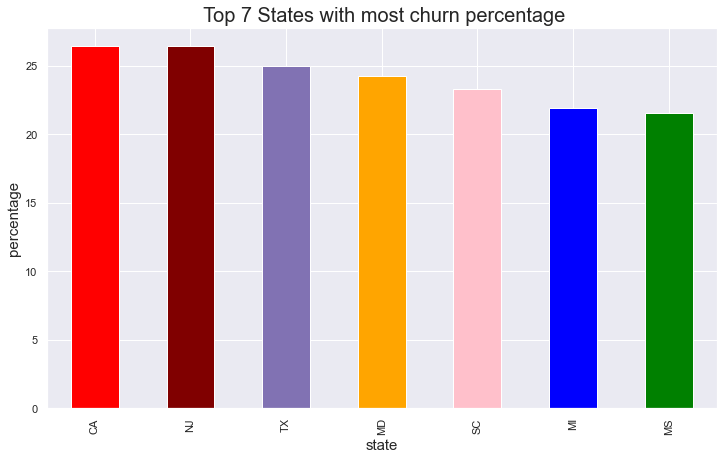

In [ ]:
# Ploting top 7 state with high churn
plt.rcParams['figure.figsize'] = (12, 7)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((df.groupby(['state'])['churn'].mean())*100).sort_values(
    ascending = False).head(7).plot.bar(
        color = ['red','maroon','m','orange','pink','blue','green'])
plt.title(" Top 7 States with most churn percentage", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

In [ ]:
def x_with_churn(s_data,s_col1,s_col2, nw_col):
    churn_df= pd.crosstab(s_data[s_col1],s_data[s_col2])
    churn_df[nw_col] = churn_df.apply(lambda x : x[1]/(x[0]+x[1])*100, axis=1)
    return churn_df
state_churn = x_with_churn(df, "state", "churn", 'state_churn_%')
state_churn.head()

churn,False,True,state_churn_%
state,,,
AK,49,3,5.769231
AL,72,8,10.000000
AR,44,11,20.000000
AZ,60,4,6.250000
CA,25,9,26.470588


Among the 7 top states with churners, CA state has a higher rate of churn.

In [ ]:
df.groupby(['state'])['churn'].mean().sort_values(ascending = False).head(12)

state
CA    0.264706
NJ    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
MT    0.205882
AR    0.200000
Name: churn, dtype: float64

Out of the 51 state the above states has the highest rates of charn which is above 20.

### **International Plan**



In [ ]:
# dataframe for value international plan value count and  percentage 
inter_dic = dict(df['international plan'].value_counts())
inter_key = list(dict(dict(inter_dic)).keys())
inter_val = list(dict(dict(inter_dic)).values())
inter_val_percnt = np.round(inter_val/sum(inter_val), 3)
inter_plan = pd.DataFrame({'inter_key': inter_key,
                           'inter_val': inter_val,
                           'inter_val_%': inter_val_percnt})
inter_plan

,inter_key,inter_val,inter_val_%
0,no,3010,0.903
1,yes,323,0.097


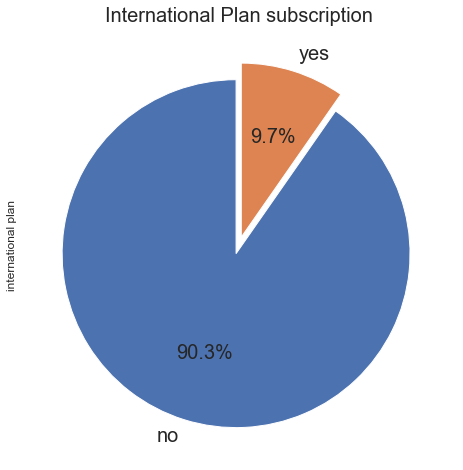

In [ ]:
# international piechart

pie(df,'international plan', 'International Plan subscription')

**9.7%** of the total customers had subscribe for the international plan and the others had not. This is a lower number which might be attribute with the high rates.

In [ ]:
# Calculate the International Plan vs Churn percentage
inter_plan_churn = x_with_churn(df, "international plan", "churn", )
inter_plan_churn

churn,False,True,intern_plan_churn_%
international plan,,,
no,2664,346,11.495017
yes,186,137,42.414861


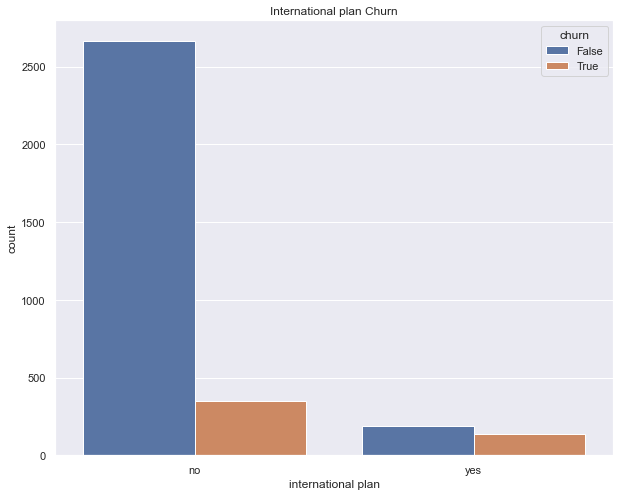

In [ ]:
# ploting barchart for international plan distribution 
count_plt(df['international plan'], df.churn, (10,8), 'International plan Churn')

From the above anaylysis, out of 3010 customers who had not subscribe for international plan 346 (11.49%) turn to be churners which is quit a high number. For the customers who subscribed for international plan out of 323, 137 custormers (42.4%) are churners. This means that most international customers ended up leaving the company.

### Distribution of variables
We need to check how the features are distributed.

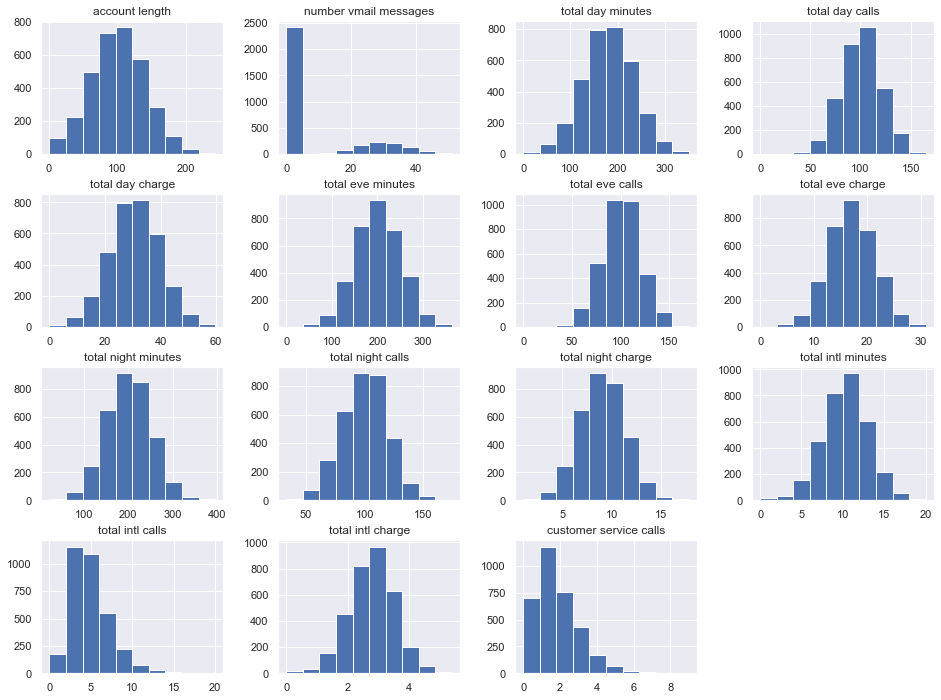

In [ ]:
# distribution of features
df.drop(columns='churn').hist(figsize=(16,12));

Most of the variable are evenly distibuted hence scalling and nornalization will be done later.

## Correlation

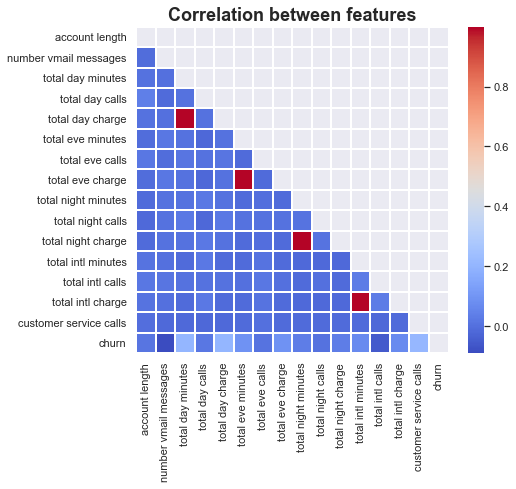

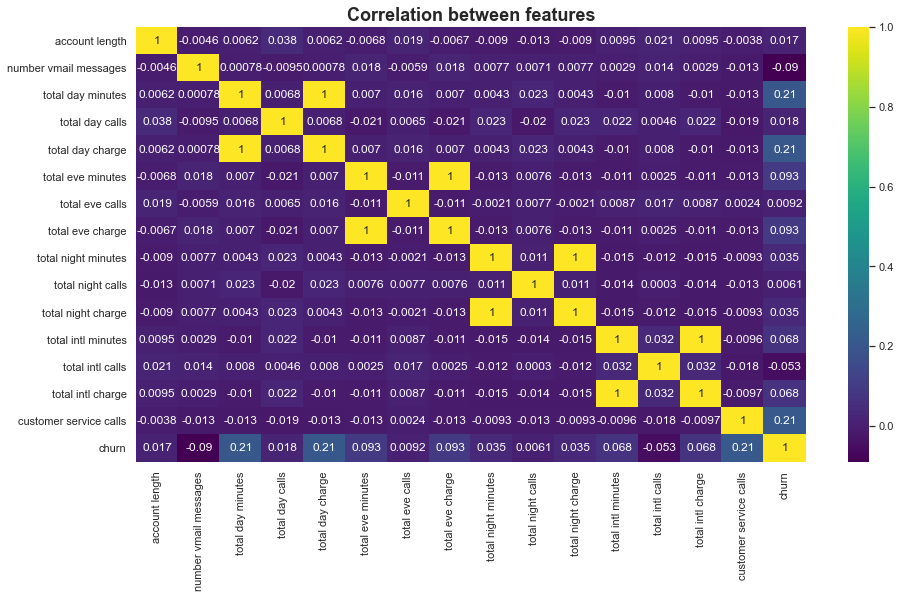

In [ ]:
corr = df.corr()
plt.figure(figsize=(7,6))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(df.corr(), cmap= 'coolwarm', mask= mask, linewidth= 1)
plt.title("Correlation between features",weight='bold',fontsize=18)
plt.show()

fig, ax = plt.subplots(figsize=(15,8))
ax= sns.heatmap(df.corr(), annot=True, cmap="viridis")
plt.title("Correlation between features",weight='bold',fontsize=18);


There is a very low correlation between most features. However, there is a perfect positive correlation between total evening charge and total evening minutes, total day charge and total day minutes, total night charge and total night minutes, and total international charge and total international minutes. This is expected since the charge of a call depends on the length of the call in minutes. One correlated variable will have to be dropped from each pair to handle multicollinearity.

Total day minutes, total day charge and customer service calls have a weak positive correlation with churn.

The other features have a negligible correlation with churn, approximately 0.

## Machine Learning

At this point we have get an overview of the features. The next step is to prepare data for machine learning.<br>
First we have to deal with multicollinearity features. We will drop one feature of those feature having high correlation of 0.75 and above.

In [ ]:
# pairs with collinearity > 0.75
colin_df = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
colin_df['pairs'] = list(zip(colin_df.level_0, colin_df.level_1))
colin_df.set_index(['pairs'], inplace = True)
colin_df.drop(columns=['level_1', 'level_0'], inplace = True)
colin_df.columns = ['cc']
colin_df.drop_duplicates(inplace=True)
colin_df[(colin_df.cc>.75) & (colin_df.cc<1)]

,cc
pairs,
"(total day charge, total day minutes)",1.000000
"(total eve charge, total eve minutes)",1.000000
"(total night minutes, total night charge)",0.999999
"(total intl charge, total intl minutes)",0.999993


The following columns will be drop since the same information can be found on the remain pairs.
`'total day charge', 'total eve charge', 'total night charge', 'total intl charge'`

In [ ]:
# drop some columns to address the collinearity
df = df.drop(columns = ['total day charge', 'total eve charge', 'total night charge', 'total intl charge'],axis=1)
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total eve minutes',
       'total eve calls', 'total night minutes', 'total night calls',
       'total intl minutes', 'total intl calls', 'customer service calls',
       'churn'],
      dtype='object')

## Train and Test split

Now we need to set our `X` and `y` varialbe which then will be split into training and test. Test set will be 25%, random state of 42.


In [ ]:
# Assinging the predictor and the target variable
X = df.drop(['churn', 'phone number'], axis=1)
y = df.churn
# spliting the data in to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
# X_train preview
X_train.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
367,MD,45,415,no,no,0,78.2,127,253.4,108,255.0,100,18.0,3,1
3103,DE,115,415,no,no,0,195.9,111,227.0,108,313.2,113,13.2,1,2
549,OK,121,408,no,yes,31,237.1,63,205.6,117,196.7,85,10.1,5,4
2531,RI,180,415,no,no,0,143.3,134,180.5,113,184.2,87,10.1,4,1
2378,OR,112,510,no,no,0,206.2,122,164.5,94,140.3,101,12.6,7,3


### Transform categorical variables
Next we transform categorical data.

In [ ]:
# Creating dummy variables for the categorical columns
X_train = pd.get_dummies(X_train,drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_train.head()

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510,international plan_yes,voice mail plan_yes
367,45,0,78.2,127,253.4,108,255.0,100,18.0,3,...,0,0,0,0,0,0,1,0,0,0
3103,115,0,195.9,111,227.0,108,313.2,113,13.2,1,...,0,0,0,0,0,0,1,0,0,0
549,121,31,237.1,63,205.6,117,196.7,85,10.1,5,...,0,0,0,0,0,0,0,0,0,1
2531,180,0,143.3,134,180.5,113,184.2,87,10.1,4,...,0,0,0,0,0,0,1,0,0,0
2378,112,0,206.2,122,164.5,94,140.3,101,12.6,7,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Fit SMOTE to training data
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 

# Preview synthetic sample class distribution
print(pd.Series(y_train_resampled).value_counts()) 

True     2141
False    2141
Name: churn, dtype: int64


The distribution of the churn classes is now balanced. SMOTE was applied on the training sets only. This ensured that an accurate gauge can be made on the model's performance by using a raw test sample that has not been oversampled or undersampled.

## Modeling 

## Logistic Regression

Logistic regression model will be used as the baseline model. `liblinear` is used as the solver since the size of the dataset is small.

In [ ]:
# create a pipeline
pipe_log = Pipeline(steps=[('scale', StandardScaler()), ('logreg', LogisticRegression(fit_intercept=False, solver='liblinear'))])
pipe_log.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scale', StandardScaler()),
                ('logreg',
                 LogisticRegression(fit_intercept=False, solver='liblinear'))])

Precision score: 
Train: 0.9541237113402062
Test:  0.45

Recall score: 
Train: 0.864549276039234
Test:  0.216

Accuracy : 
Train: 0.9114899579635685
Test:  0.842925659472422


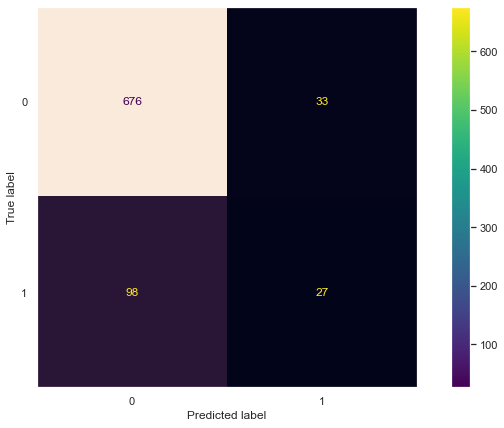

In [ ]:
# function to evaluate the performance of the model
def evaluate(model, X_test, y_test):
    y_train_preds = model.predict(X_train_resampled)
    y_test_preds = model.predict(X_test)
    print('Precision score: ')
    print('Train:', precision_score(y_train_resampled, y_train_preds))
    print('Test: ', precision_score(y_test, y_test_preds))
    print('')
    print('Recall score: ')
    print('Train:', recall_score(y_train_resampled, y_train_preds))
    print('Test: ', recall_score(y_test, y_test_preds))
    print('')
    print('Accuracy : ')
    print('Train:', accuracy_score(y_train_resampled, y_train_preds))
    print('Test: ', accuracy_score(y_test, y_test_preds))
    cm = confusion_matrix(y_test, y_test_preds)
    disp = ConfusionMatrixDisplay(cm).plot()
    plt.imshow(cm)
    plt.grid(False)
    plt.show();
# evaluate the performance of the model
evaluate(pipe_log, X_test, y_test)

The model is overfitting as it performs well on the training data with a precision of 95% and a recall of 86% but does not perform well on the test data which has a pecision of 45% and a recall of 21%. 
Despite the model having a high accuracy on the test data, it has a very low recall score. The model is thus performing poorly due to the large number of false negatives.

AUC: 0.7958476727785614


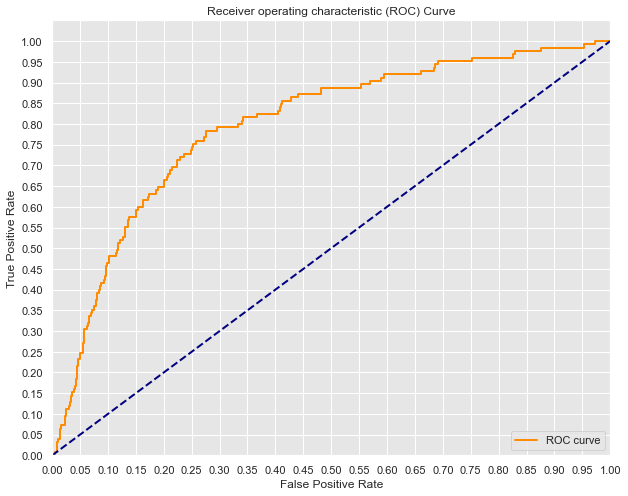

In [ ]:
def auc_roc_curve(models, X_test):
# First calculate the probability scores of each of the datapoints:
    y_score = models.decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)

    sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

    print('AUC: {}'.format(auc(fpr, tpr)))
    plt.figure(figsize=(10, 8))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
auc_roc_curve(pipe_log,X_test)

## Decision Tree Model

In [ ]:
# Create a pipeline
pipe_dt = Pipeline(steps=[('scale', StandardScaler()), ('clf', DecisionTreeClassifier(criterion='entropy', random_state=42))])
pipe_dt.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scale', StandardScaler()),
                ('clf',
                 DecisionTreeClassifier(criterion='entropy', random_state=42))])

Precision score: 
Train: 1.0
Test:  0.46190476190476193

Recall score: 
Train: 1.0
Test:  0.776

Accuracy : 
Train: 1.0
Test:  0.8309352517985612


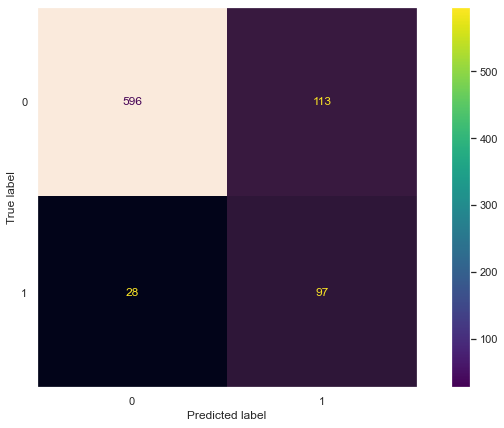

In [ ]:
# evaluate the performance of the model
evaluate(pipe_dt, X_test, y_test)

This model has better performance compared to the base line model but again the model is overfitting.

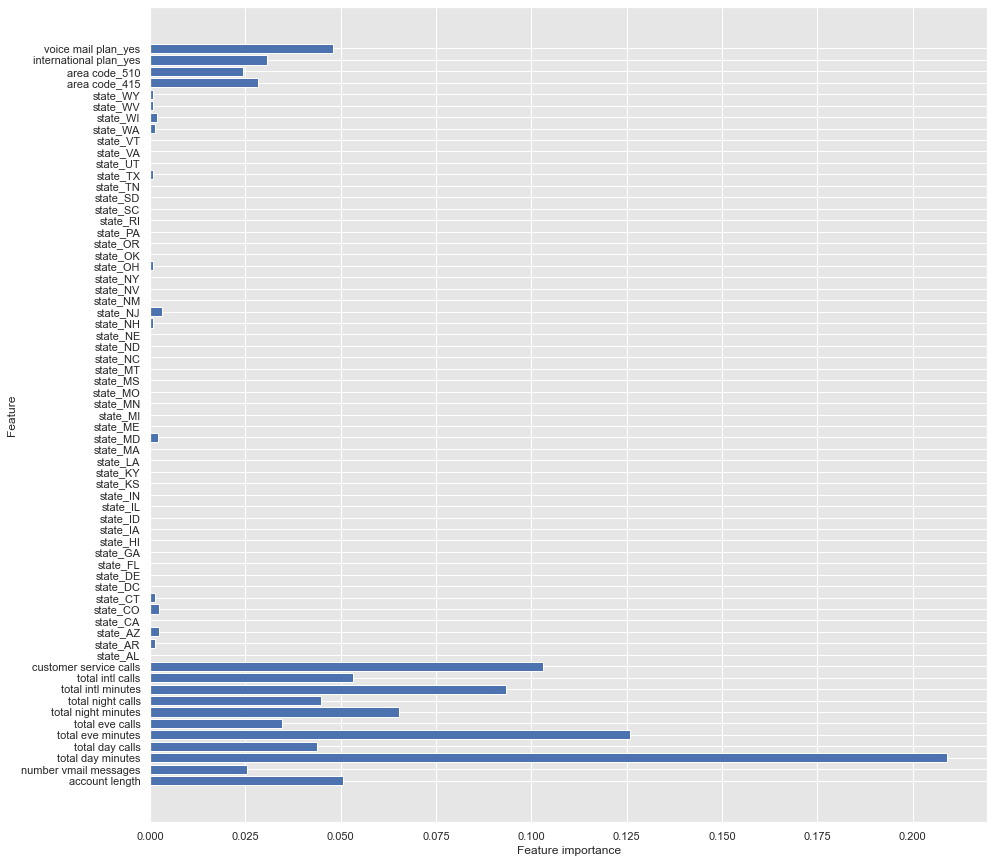

In [ ]:
# function to plot feature importances

def plot_feature_importances(pipe, figsize):
    model = pipe.steps[1][1]
    plt.figure(figsize=figsize)
    plt.barh(X_train_resampled.columns, model.feature_importances_, align='center') 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(pipe_dt, (15,15))

As seen from the graphe above,total day minutes is an important factor in determining whether a customer would churn or not, followed by total evening minutes and customer service calls. State has the least importance in predicting customer churn.

### Feature selection.

Recursive feature elimination with cross-validation is used to select a subset of features relevant for model construction.

In [ ]:
# feature selection using RFECV
rfecv = RFECV(estimator=DecisionTreeClassifier(random_state=42), scoring='recall')
pipe_dt2 = Pipeline(steps=[('scale', StandardScaler()), ('Feature Selection', rfecv), ('clf', DecisionTreeClassifier(random_state=42))])
pipe_dt2.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scale', StandardScaler()),
                ('Feature Selection',
                 RFECV(estimator=DecisionTreeClassifier(random_state=42),
                       scoring='recall')),
                ('clf', DecisionTreeClassifier(random_state=42))])

In [ ]:
# optimal number of features selected via cross-validation
print(f'Optimal number of features: {rfecv.n_features_}' )

Optimal number of features: 43


Out of the 65 features, there are 43 optimal features
The selected features are shown below:

In [ ]:
# selected features (assigned a rank of 1)
rfecv_df = pd.DataFrame(rfecv.ranking_,index=X_train_resampled.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfecv_df[rfecv_df['Rank'] == 1]

,Rank
account length,1
state_KS,1
state_KY,1
state_MA,1
state_ME,1
international plan_yes,1
state_MS,1
state_NC,1
state_ND,1
state_NJ,1


In [ ]:
# remove columns that are not part of the optimal features
cols = rfecv_df[rfecv_df['Rank'] == 1].index
X_train_resampled = X_train_resampled[cols]
X_test = X_test[cols]
X_train_resampled.head()

,account length,state_KS,state_KY,state_MA,state_ME,international plan_yes,state_MS,state_NC,state_ND,state_NJ,...,customer service calls,state_AL,state_ID,total day calls,state_CA,total day minutes,state_GA,state_DC,state_CT,state_CO
0,45,0,0,0,0,0,0,0,0,0,...,1,0,0,127,0,78.2,0,0,0,0
1,115,0,0,0,0,0,0,0,0,0,...,2,0,0,111,0,195.9,0,0,0,0
2,121,0,0,0,0,0,0,0,0,0,...,4,0,0,63,0,237.1,0,0,0,0
3,180,0,0,0,0,0,0,0,0,0,...,1,0,0,134,0,143.3,0,0,0,0
4,112,0,0,0,0,0,0,0,0,0,...,3,0,0,122,0,206.2,0,0,0,0


## Hyperparameter tuning of the decision tree model

The hyperparameters of the decision tree including max_depth, min_samples_leaf, min_samples_split can be tuned to early stop the growth of the tree and prevent the model from overfitting.

In [ ]:
# hyperparameter tuning using GridSearchCV
params_dt = {'clf__criterion': ['gini', 'entropy'],
             'clf__max_depth': range(14, 32, 2),
             'clf__min_samples_split' : range(2, 10, 2),
             'clf__min_samples_leaf': [2, 3, 5, 7, 10],
             'clf__max_features': [11, 13, 15]
}

gridsearch_dt = GridSearchCV(pipe_dt, params_dt, cv=4, scoring='recall')
gridsearch_dt.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('clf',
                                        DecisionTreeClassifier(criterion='entropy',
                                                               random_state=42))]),
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': range(14, 32, 2),
                         'clf__max_features': [11, 13, 15],
                         'clf__min_samples_leaf': [2, 3, 5, 7, 10],
                         'clf__min_samples_split': range(2, 10, 2)},
             scoring='recall')

In [ ]:
# parameters that gave the best result
print(f'Optimal parameters: {gridsearch_dt.best_params_}')

# Mean cross-validated score of the best_estimator
print(f'Validation recall: {gridsearch_dt.best_score_}')

Optimal parameters: {'clf__criterion': 'entropy', 'clf__max_depth': 26, 'clf__max_features': 13, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 2}
Validation recall: 0.8491299344399499


Precision score: 
Train: 0.9641170915958451
Test:  0.42771084337349397

Recall score: 
Train: 0.9537599252685661
Test:  0.568

Accuracy : 
Train: 0.9591312470808033
Test:  0.8213429256594724


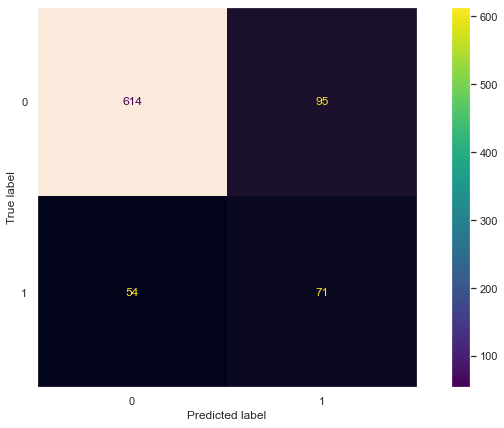

In [ ]:
# evaluate the performance of the model
evaluate(gridsearch_dt, X_test, y_test)

On tuning the model, There is a decrease in the difference between the train scores and the test scores hence there is overfitting reduced
The model is performing better based on the recall score. However, the precision score is slightly low.

### Random forest
Random forest is used since it is naturally resistant to noise and variance.

In [ ]:
# create a pipeline
rf_pipe = Pipeline(steps=[('scale', StandardScaler()), ('rf', RandomForestClassifier(random_state=42))])
rf_pipe.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scale', StandardScaler()),
                ('rf', RandomForestClassifier(random_state=42))])

Precision score: 
Train: 1.0
Test:  0.7378640776699029

Recall score: 
Train: 1.0
Test:  0.608

Accuracy : 
Train: 1.0
Test:  0.9088729016786571


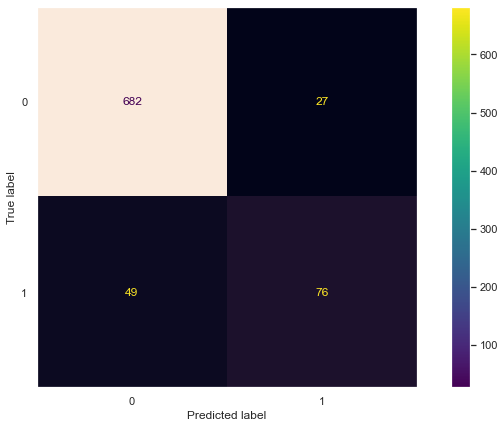

In [ ]:
# evaluate model performance
evaluate(rf_pipe, X_test, y_test)

This model has a higher recall compared to the baseline logistic regression model and the decision tree model. However the model is overfitting.

### Hyperparameter tuning of the random forest model

There are some parameters of random forest that can be tuned for the model’s better performance. This includes n_estimators, max_depth, min_samples_split, min_samples_leaf and max_features.

In [ ]:
# hyperparameter tuning using GridSearchCV
rf_params = {'rf__n_estimators': range(400, 800, 200),
             'rf__criterion': ['gini', 'entropy'],
             'rf__max_depth': range(14, 20, 2),
             'rf__min_samples_split': range(3, 4, 7),
             'rf__min_samples_leaf': [5, 7, 12]
             
}

gsearch_rf = GridSearchCV(rf_pipe, rf_params, cv=4, scoring='recall')
gsearch_rf.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': range(14, 20, 2),
                         'rf__min_samples_leaf': [5, 7, 12],
                         'rf__min_samples_split': range(3, 4, 7),
                         'rf__n_estimators': range(400, 800, 200)},
             scoring='recall')

Precision score: 
Train: 0.9600385170919595
Test:  0.6693548387096774

Recall score: 
Train: 0.9313404950957497
Test:  0.664

Accuracy : 
Train: 0.9462867818776273
Test:  0.9004796163069544


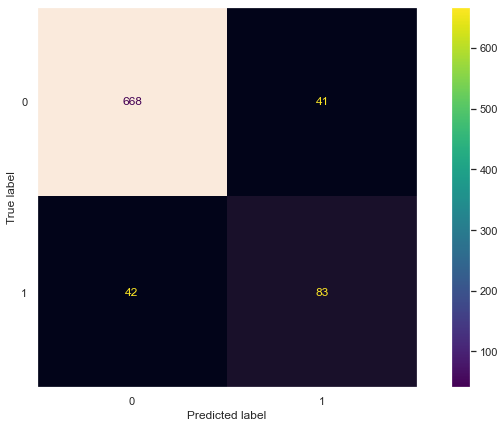

In [ ]:
# evaluate the performance of the model
evaluate(gsearch_rf, X_test, y_test)


After tuning (Hyperparameter) the model, the recall increases by 6%. Generally this model has an overall good performance from the previous models


## Model Evaluation

Decision tree with tuned hyperparameters is the model with the best performance. 
The model has the recall score of 66.4%. The accuracy and precision scores are above average. <br>
However, the recall score achieved is below the one for decision tree which has training score of 1 hence overfitting.<br>
The evaluation metric values of the tuned random forest are shown below:

In [ ]:
# evaluation metrics of the best model based on the test data
print('RANDOM (TUNED) SCORES:')
print('Test Recall score: ', recall_score(y_test, gsearch_rf.predict(X_test)))
print('Test Precision score: ', precision_score(y_test, gsearch_rf.predict(X_test)))
print('Test Accuracy score: ', accuracy_score(y_test, gsearch_rf.predict(X_test)))

RANDOM (TUNED) SCORES:
Test Recall score:  0.664
Test Precision score:  0.6693548387096774
Test Accuracy score:  0.9004796163069544


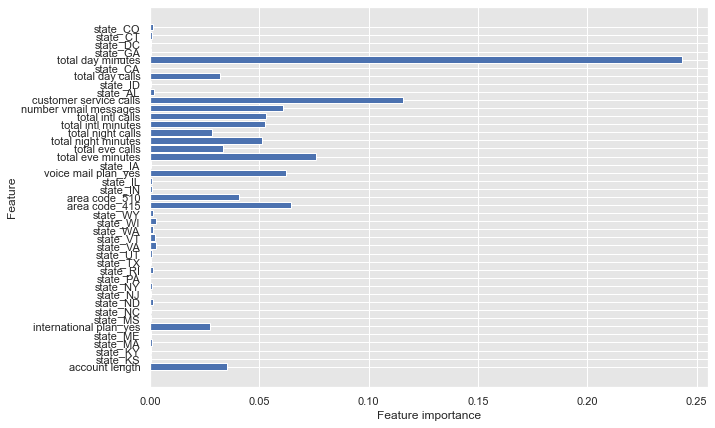

In [ ]:
# plot feature importances of the best model using the defined function
# function takes in the pipeline name and figsize.
plot_feature_importances(gsearch_rf.best_estimator_, (10,7))

The final model that will be used to predict customer churn is the random forest with tuned hyperparameters.This model results in the lowest number of false negatives.<br>
The most important features for predicting customer churn are:
- total day minutes: total number of minutes the customer has been in calls during the day
- total evening minutes: total number of minutes the customer has been in calls during the evening
- customer service calls: number of calls the customer has made to customer service
- total international minutes: total number of minutes the user has been in international calls
 
Syriatel should ensure effective customer service so as to meet customers' expectations and analyze customer interactions. They can then follow up on both positive and negative feedbacks received.<br>
The more the number of minutes the customer spends on the phone, the higher the likelihood of not churning.  The company should look into the call charge rates in comparison to the competitors, and  consider if they should lower the charges of calls per minute. This can prevent other customers from churning.

The targeted recall score of 85% is not achieved by the best performing model. There is still some overfitting in the model irregardless of hyperparameter tuning.<br>
The training data size should be increased to reduce overfitting and hence improve model performance.